In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('./avocado.csv')
df.head()

,Code,Date,AveragePrice,Total Volume,small Hass,large Hass,extra large Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18249 non-null  int64  
 1   Date              18249 non-null  object 
 2   AveragePrice      18249 non-null  float64
 3   Total Volume      18249 non-null  float64
 4   small Hass        18249 non-null  float64
 5   large Hass        18249 non-null  float64
 6   extra large Hass  18249 non-null  float64
 7   Total Bags        18249 non-null  float64
 8   Small Bags        18249 non-null  float64
 9   Large Bags        18249 non-null  float64
 10  XLarge Bags       18249 non-null  float64
 11  type              18249 non-null  object 
 12  year              18249 non-null  int64  
 13  region            18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isna().sum()

Code                0
Date                0
AveragePrice        0
Total Volume        0
small Hass          0
large Hass          0
extra large Hass    0
Total Bags          0
Small Bags          0
Large Bags          0
XLarge Bags         0
type                0
year                0
region              0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

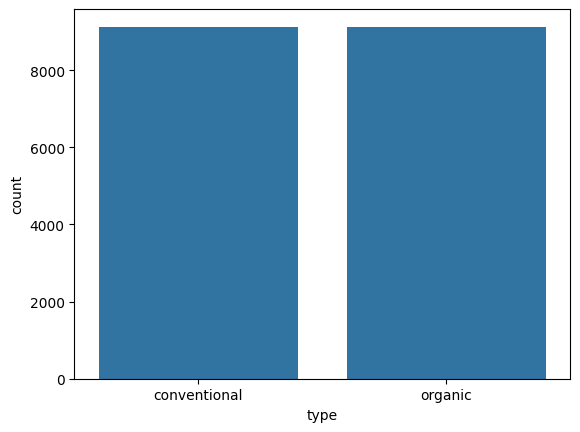

In [8]:
sns.countplot(df, x="type")

<Axes: xlabel='year', ylabel='count'>

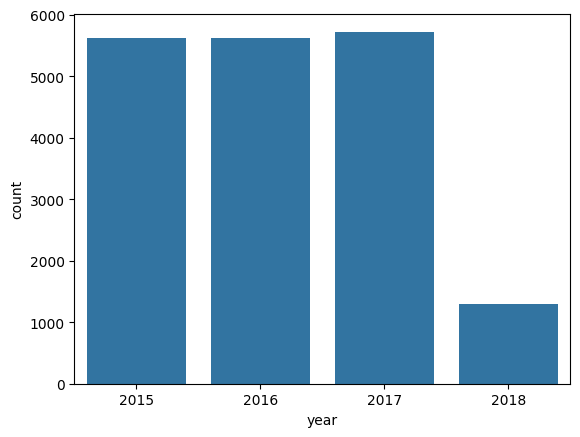

In [9]:
sns.countplot(df, x="year")

/var/folders/6r/3zbb7bfn2xl2h3h0gkgglcjr0000gn/T/ipykernel_18884/288896923.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["AveragePrice"], color = 'r')


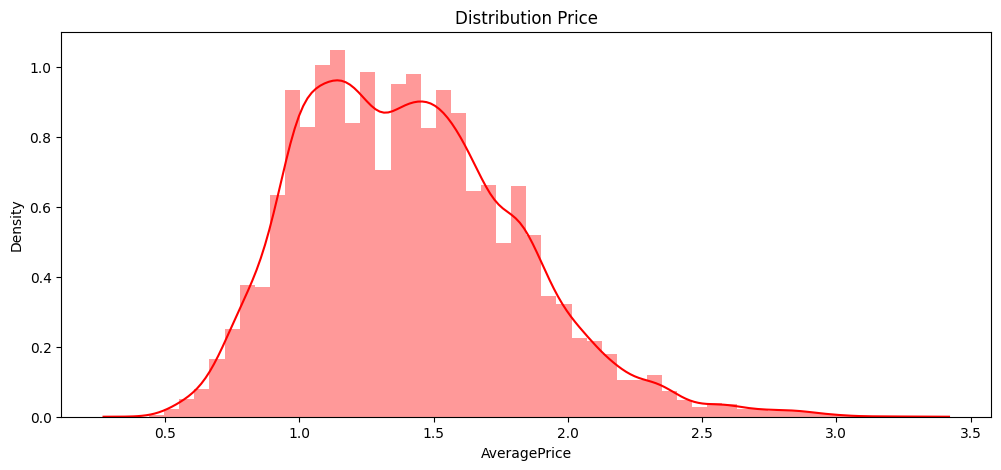

In [10]:
import pylab as pl
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(df["AveragePrice"], color = 'r')

In [11]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns.columns

Index(['Code', 'AveragePrice', 'Total Volume', 'small Hass', 'large Hass',
       'extra large Hass', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'year'],
      dtype='object')

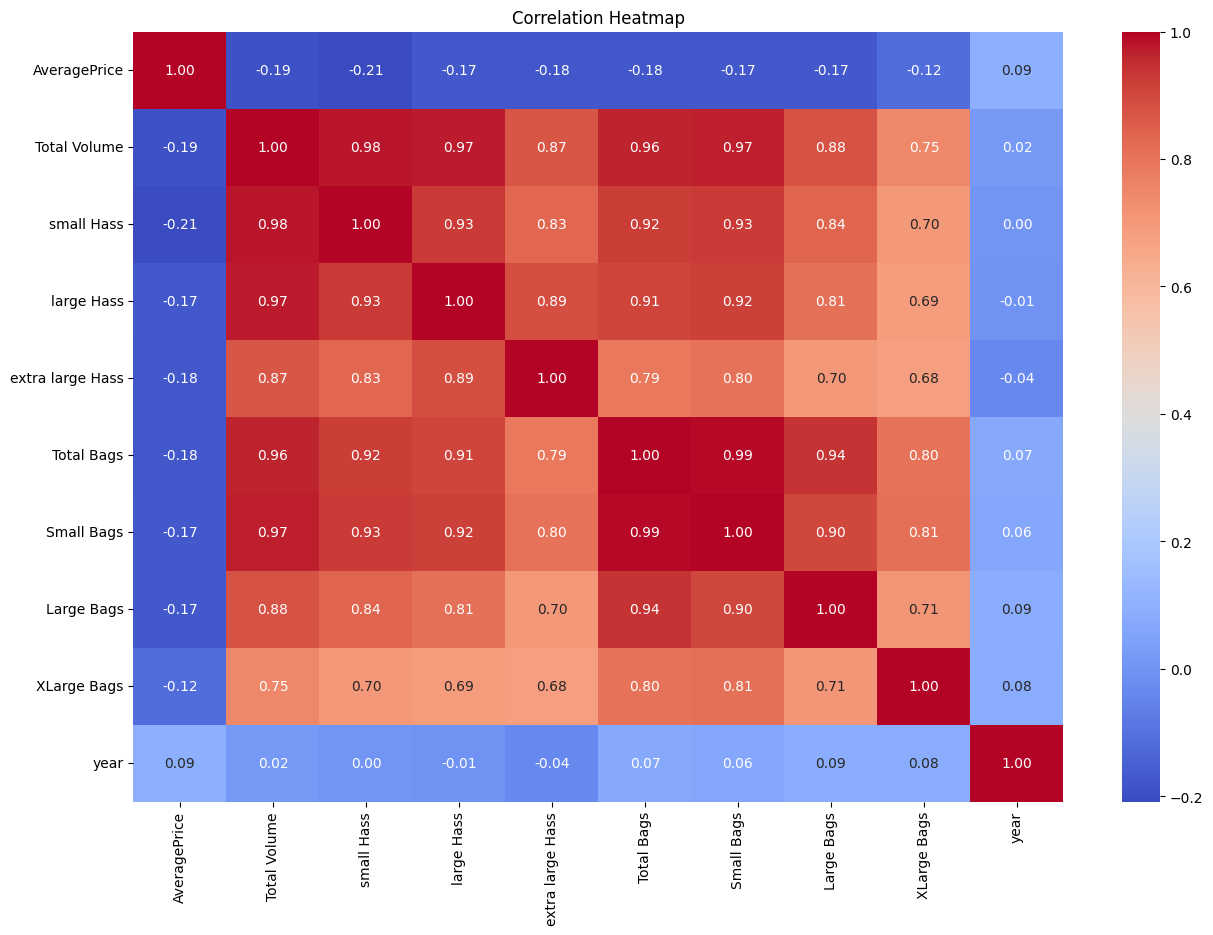

In [14]:
num_useful = df[['AveragePrice', 'Total Volume', 'small Hass', 'large Hass', 'extra large Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year']]
corr_matrix = num_useful.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X = df.drop(columns = 'AveragePrice')
y = df[['AveragePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [16]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(
    iterations=12000,
    depth=8,
    learning_rate=0.005,
    loss_function='RMSE',
    cat_features=['type', 'region', 'Date'],
    l2_leaf_reg=3,
    bagging_temperature=0.6,
    verbose=500,
    early_stopping_rounds=600
)


model.fit(X_train, y_train)

0:	learn: 0.4000952	total: 63.2ms	remaining: 12m 38s
500:	learn: 0.2023960	total: 2.36s	remaining: 54.2s
1000:	learn: 0.1710123	total: 4.86s	remaining: 53.4s
1500:	learn: 0.1540797	total: 7.35s	remaining: 51.4s
2000:	learn: 0.1420257	total: 9.85s	remaining: 49.2s
2500:	learn: 0.1324786	total: 12.4s	remaining: 47.1s
3000:	learn: 0.1247488	total: 14.9s	remaining: 44.7s
3500:	learn: 0.1183616	total: 17.4s	remaining: 42.3s
4000:	learn: 0.1131297	total: 20s	remaining: 40.1s
4500:	learn: 0.1086793	total: 22.5s	remaining: 37.6s
5000:	learn: 0.1047435	total: 25.1s	remaining: 35.1s
5500:	learn: 0.1013175	total: 27.6s	remaining: 32.6s
6000:	learn: 0.0981602	total: 30.2s	remaining: 30.2s
6500:	learn: 0.0953060	total: 32.8s	remaining: 27.7s
7000:	learn: 0.0927085	total: 35.3s	remaining: 25.2s
7500:	learn: 0.0902816	total: 37.8s	remaining: 22.7s
8000:	learn: 0.0880173	total: 40.3s	remaining: 20.2s
8500:	learn: 0.0859683	total: 42.8s	remaining: 17.6s
9000:	learn: 0.0839894	total: 45.3s	remaining: 15

In [17]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.9401872910487574